In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [18]:
df = pd.read_csv('../data/marketing.csv')
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [19]:
Y = df['sales']
D = df['newspaper']


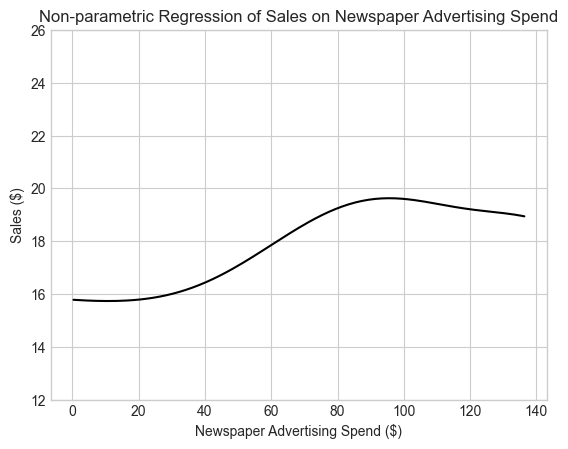

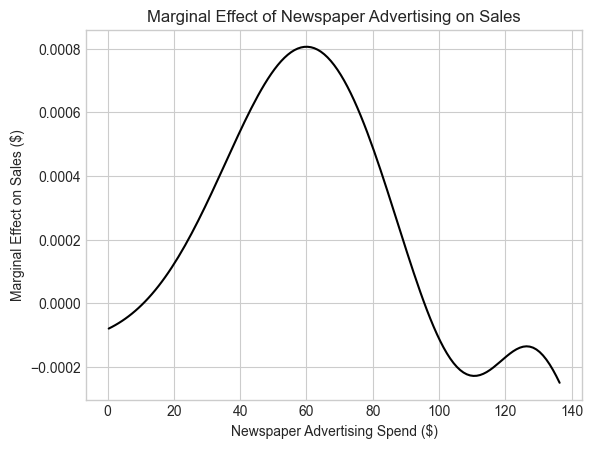

In [20]:
x_axis = np.arange(min(D), max(D))
results = sm.nonparametric.KernelReg(Y, D, 
        var_type='c', 
        bw='cv_ls',
        reg_type='lc').fit(x_axis)

plt.plot(x_axis, results[0], color='black') # Plot average sales
plt.xlabel('Newspaper Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.title('Non-parametric Regression of Sales on Newspaper Advertising Spend')
plt.ylim([12, 26])
plt.show()
plt.plot(x_axis, results[1], color='black') # Plot impact
plt.ylabel('Marginal Effect on Sales ($)')
plt.title('Marginal Effect of Newspaper Advertising on Sales')
plt.xlabel('Newspaper Advertising Spend ($)')
plt.show()



## Interpretation of A/B Test Results
In this marketing example between the treatment (newspaper spend) and outcome (sales), we observe that on average the newspaper spend has a positive effect on sales. However, this is not the case for spend beyond $100K as the outcome starts to decline. This suggests that there are diminishing returns to newspaper spend, and that there may be an optimal level of spend beyond which additional investment does not yield proportional increases in sales.

We also observe the marginal effect of newspaper spend on sales by calculating the derivative of the sales with respect to newspaper spend. The marginal effect is positive for newspaper spend up to \$60K, indicating that each additional dollar spent on newspaper advertising leads to an increase in sales. However, beyond \$60K, the marginal effect becomes negative, suggesting that further increases in newspaper spend actually lead to a decrease in sales. This highlights the importance of carefully considering the level of investment in advertising and its potential impact on sales outcomes.

C:\Users\X1 User\AppData\Local\Temp\ipykernel_19920\848077679.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to prevent title/legend clipping


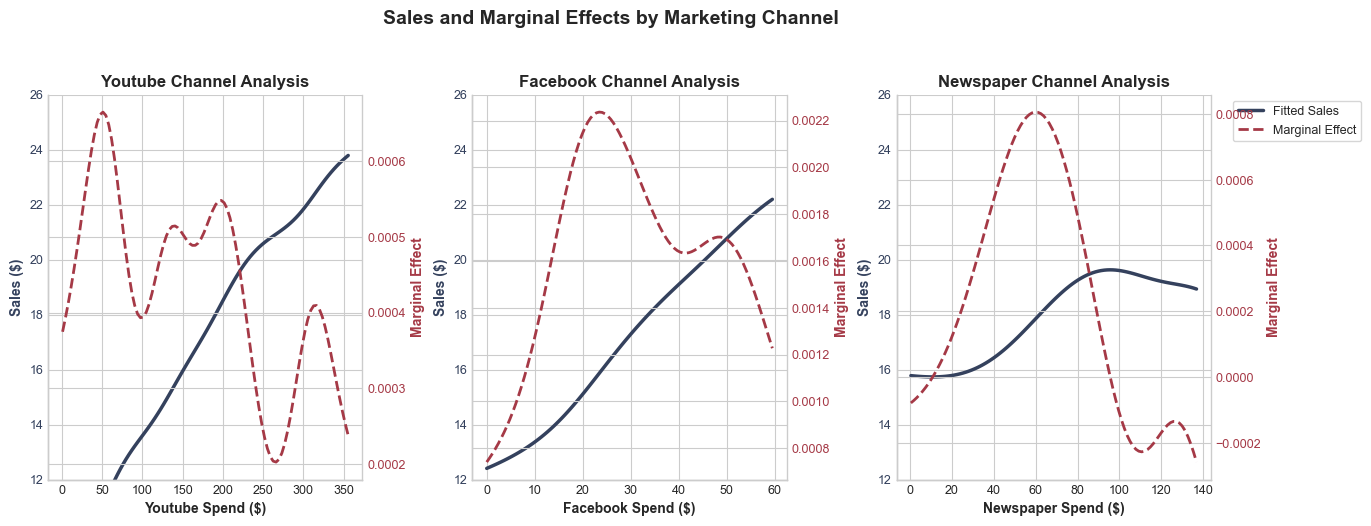

In [21]:


# Use a built-in style for a cleaner default aesthetic
plt.style.use('seaborn-v0_8-whitegrid') #

treatment_candidates = ['youtube', 'facebook', 'newspaper']
fig = plt.figure(figsize=(15, 5)) # Slightly increased height for better spacing
gs = gridspec.GridSpec(1, 3, wspace=0.35) # Increased horizontal spacing

for i, treatment in enumerate(treatment_candidates):
    x_axis = np.linspace(df[treatment].min(), df[treatment].max(), 100)
    # Ensure sm is imported from statsmodels.api
    results = sm.nonparametric.KernelReg(endog=df['sales'], exog=df[treatment], var_type='c', reg_type='lc', bw='cv_ls').fit(x_axis)
    
    ax1 = fig.add_subplot(gs[0, i])
    color1 = '#34415D' 
    color2 = '#A53946' 

    # Improve font sizes and use title for subplot
    ax1.set_xlabel(f'{treatment.capitalize()} Spend ($)', fontsize=10, fontweight='bold') #
    ax1.set_ylabel('Sales ($)', color=color1, fontsize=10, fontweight='bold')
    ax1.plot(x_axis, results[0], color=color1, label='Fitted Sales', linewidth=2.5) # Thicker lines
    ax1.tick_params(axis='y', labelcolor=color1, labelsize=9)
    ax1.tick_params(axis='x', labelsize=9)
    ax1.set_ylim([12, 26])
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Marginal Effect', color=color2, fontsize=10, fontweight='bold')
    ax2.plot(x_axis, results[1], color=color2, linestyle='--', label='Marginal Effect', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color2, labelsize=9)
    ax1.set_title(f'{treatment.capitalize()} Channel Analysis', fontsize=12, fontweight='bold')
    
    # Remove top and right spines for a cleaner look
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False) # Keep the right spine for ax2
    
    # Consolidate the legend in the last plot for clarity across all charts
    if i == 2:
        # Combine handles and labels from both axes
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9, frameon=True) # Place legend outside

# Add a suptitle for the entire figure
fig.suptitle('Sales and Marginal Effects by Marketing Channel', fontsize=14, fontweight='bold', y=1.05)

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to prevent title/legend clipping
plt.show()
